In [1]:
!pip install geopandas fiona pyogrio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.6 MB/s eta 0:00:00


In [2]:
import zipfile, os

In [ ]:
# import pandas as pd
# import geopandas as gpd
# import os

# def attach_lat_lon(county_code, table_dir, spatial_dir, output_dir):
#     """
#     Adds lat/lon to Excel file using SSURGO shapefile for a given county.

#     Parameters:
#     - county_code: e.g., 'MD001'
#     - table_dir: path to directory with Excel files
#     - spatial_dir: path to base directory with spatial folders
#     - output_dir: where to save the output CSV
#     """

#     excel_path = os.path.join(table_dir, f"{county_code}.xlsx")
#     shapefile_path = os.path.join(spatial_dir, county_code, county_code, "spatial", f"soilmu_a_{county_code.lower()}.shp")

#     df = pd.read_excel(excel_path)
#     df["Mapunit Key"] = df["Mapunit Key"].astype(str)

#     gdf = gpd.read_file(shapefile_path)
#     gdf_proj = gdf.to_crs(epsg=32618)
#     gdf_proj["centroid"] = gdf_proj.geometry.centroid
#     gdf_centroid = gdf_proj.set_geometry("centroid").to_crs(epsg=4326)
#     gdf_centroid["latitude"] = gdf_centroid.geometry.y
#     gdf_centroid["longitude"] = gdf_centroid.geometry.x

#     gdf_latlon = gdf_centroid[["MUKEY", "latitude", "longitude"]].drop_duplicates()
#     gdf_latlon.columns = ["mukey", "latitude", "longitude"]
#     gdf_latlon["mukey"] = gdf_latlon["mukey"].astype(str)
#     gdf_latlon_clean = gdf_latlon.groupby("mukey", as_index=False).agg({"latitude": "mean", "longitude": "mean"})

#     # Merge
#     df_merged = df.merge(gdf_latlon_clean, left_on="Mapunit Key", right_on="mukey", how="left").drop(columns=["mukey"])

#     # Save output
#     output_path = os.path.join(output_dir, f"{county_code}_with_latlon.csv")
#     df_merged.to_csv(output_path, index=False)
#     print(f"✅ Processed {county_code}: {len(df_merged)} rows saved to {output_path}")


In [3]:
zip_path = '/content/SSU.zip'
extract_path = "/content/SSURGO"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
zip_path = '/content/Tables.zip'
extract_path = "/content/Soil Data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [5]:
import pandas as pd
import geopandas as gpd
import os

In [6]:
extract_path = "/content/Soil Data LL"

In [244]:
def attach_lat_lon(county_code):

    excel_path = f"/content/Soil Data/Tables/{county_code}.xlsx"
    shp_path = f"/content/SSURGO/SSU/{county_code}/spatial/soilmu_a_{county_code.lower()}.shp"

    df = pd.read_excel(excel_path)
    df["Mapunit Key"] = df["Mapunit Key"].astype(str)

    gdf = gpd.read_file(shp_path)
    gdf_proj = gdf.to_crs(epsg=32618)
    gdf_proj["centroid"] = gdf_proj.geometry.centroid
    gdf_centroid = gdf_proj.set_geometry("centroid").to_crs(epsg=4326)
    gdf_centroid["latitude"] = gdf_centroid.geometry.y
    gdf_centroid["longitude"] = gdf_centroid.geometry.x

    gdf_latlon = gdf_centroid[["MUKEY", "latitude", "longitude"]].drop_duplicates()
    gdf_latlon.columns = ["mukey", "latitude", "longitude"]
    gdf_latlon["mukey"] = gdf_latlon["mukey"].astype(str)
    gdf_latlon_clean = gdf_latlon.groupby("mukey", as_index=False).agg({"latitude": "mean", "longitude": "mean"})

    df_merged = df.merge(gdf_latlon_clean, left_on="Mapunit Key", right_on="mukey", how="left").drop(columns=["mukey"])

    output_path = f"/content/Soil Data LL/{county_code}_ll.csv"
    df_merged.to_csv(output_path, index=False)
    print(f"{county_code}: {len(df_merged)} rows saved → {output_path}")


In [245]:
county_codes = [
    'MD001', 'MD005', 'MD009', 'MD011','MD013',
    'MD015','MD021', 'MD023','MD027','MD029',
    'MD031', 'MD033', 'MD035', 'MD039','MD043','MD047']

import os

os.makedirs("/content/Soil Data LL", exist_ok=True)
for code in county_codes:
    attach_lat_lon(code)


MD001: 896 rows saved → /content/Soil Data LL/MD001_ll.csv
MD005: 809 rows saved → /content/Soil Data LL/MD005_ll.csv
MD009: 176 rows saved → /content/Soil Data LL/MD009_ll.csv
MD011: 36 rows saved → /content/Soil Data LL/MD011_ll.csv
MD013: 592 rows saved → /content/Soil Data LL/MD013_ll.csv
MD015: 260 rows saved → /content/Soil Data LL/MD015_ll.csv
MD021: 111 rows saved → /content/Soil Data LL/MD021_ll.csv
MD023: 731 rows saved → /content/Soil Data LL/MD023_ll.csv
MD027: 207 rows saved → /content/Soil Data LL/MD027_ll.csv
MD029: 587 rows saved → /content/Soil Data LL/MD029_ll.csv
MD031: 2386 rows saved → /content/Soil Data LL/MD031_ll.csv
MD033: 20 rows saved → /content/Soil Data LL/MD033_ll.csv
MD035: 1190 rows saved → /content/Soil Data LL/MD035_ll.csv
MD039: 132 rows saved → /content/Soil Data LL/MD039_ll.csv
MD043: 12932 rows saved → /content/Soil Data LL/MD043_ll.csv
MD047: 144 rows saved → /content/Soil Data LL/MD047_ll.csv


In [ ]:
mappp = pd.read_csv("/content/Soil Data LL/MD005_ll.csv")

In [ ]:
latlon = mappp[["Mapunit Key", "latitude", "longitude"]]

In [ ]:
latlon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mapunit Key  809 non-null    int64  
 1   latitude     809 non-null    float64
 2   longitude    809 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 19.1 KB


In [ ]:
latlon['Mapunit Key'].unique()

array([2403681, 2404256, 2404257, 2404850, 2404971, 2405213, 2405214,
       2480927, 2480970])

In [9]:
def collect_latlon(soil_data_ll_dir):
  latlon_list = []
  for i in os.listdir(soil_data_ll_dir):
    if i.endswith(".csv"):
      df = pd.read_csv(os.path.join(soil_data_ll_dir, i))
      if {"Mapunit Key", "latitude", "longitude"}.issubset(df.columns):
        latlon_list.append(df[["Mapunit Key", "latitude", "longitude"]])
      else:
        print(f"Skipping {i}: required columns not found")

  latlon = pd.concat(latlon_list, ignore_index=True)
  latlon.drop_duplicates(inplace=True)
  return latlon

In [10]:
latlon_MD = collect_latlon("/content/Soil Data LL")

In [11]:
latlon_MD.head()

,Mapunit Key,latitude,longitude
0,534127,39.474355,-77.655944
15,534131,39.669267,-77.934244
113,534133,39.584099,-77.593210
130,534135,39.522857,-77.626552
147,534141,39.690459,-78.236861


In [12]:
latlon_MD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 21143
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mapunit Key  304 non-null    int64  
 1   latitude     304 non-null    float64
 2   longitude    304 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [13]:
latlon_MD['Mapunit Key'].nunique()

304

In [76]:
latlon_MD.to_csv("/content/latlon_MD.csv", index=False)

In [14]:
import folium
m = folium.Map(location=[latlon_MD["latitude"].mean(), latlon_MD["longitude"].mean()], zoom_start=10)

for _, row in latlon_MD.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        popup=f"Mapunit Key: {row['Mapunit Key']}"
    ).add_to(m)

m

In [246]:
def combine_soil_data_with_county(folder_path):
    county_map = {
        "MD001_ll": "Allegany County",
        "MD005_ll": "Baltimore County",
        "MD009_ll": "Calvert County",
        "MD011_ll": "Caroline County",
        "MD013_ll": "Carroll County",
        "MD015_ll": "Cecil County",
        "MD021_ll": "Frederick County",
        "MD023_ll": "Garrett County",
        "MD027_ll": "Howard County",
        "MD029_ll": "Kent County",
        "MD031_ll": "Montgomery County",
        "MD033_ll": "Prince George's County",
        "MD035_ll": "Queen Anne's County",
        "MD039_ll": "Somerset County",
        "MD043_ll": "Washington County",
        "MD047_ll": "Worcester County"
    }

    all_data = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            code = filename.split(".")[0]
            file_path = os.path.join(folder_path, filename)

            df = pd.read_csv(file_path)
            df["County"] = county_map.get(code, code)

            all_data.append(df)
            print(f"Loaded {filename} with {len(df)} rows")

    combined_df = pd.concat(all_data, ignore_index=True)
    print(f"\nFinal Combined Data: {combined_df.shape[0]} rows from {len(all_data)} counties.")
    return combined_df


In [247]:
combined_soil_df = combine_soil_data_with_county("/content/Soil Data LL")

combined_soil_df.head()
combined_soil_df.to_csv("/content/SoilData_MD.csv", index=False)


Loaded MD043_ll.csv with 12932 rows
Loaded MD035_ll.csv with 1190 rows
Loaded MD023_ll.csv with 731 rows
Loaded MD027_ll.csv with 207 rows
Loaded MD047_ll.csv with 144 rows
Loaded MD009_ll.csv with 176 rows
Loaded MD031_ll.csv with 2386 rows
Loaded MD033_ll.csv with 20 rows
Loaded MD021_ll.csv with 111 rows
Loaded MD029_ll.csv with 587 rows
Loaded MD005_ll.csv with 809 rows
Loaded MD013_ll.csv with 592 rows
Loaded MD001_ll.csv with 896 rows
Loaded MD015_ll.csv with 260 rows
Loaded MD011_ll.csv with 36 rows
Loaded MD039_ll.csv with 132 rows

Final Combined Data: 21209 rows from 16 counties.


In [17]:
combined_soil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21209 entries, 0 to 21208
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Mapunit Key                                          21209 non-null  int64  
 1   Mapunit Name                                         21209 non-null  object 
 2   Component Key                                        21209 non-null  int64  
 3   Component Name                                       21209 non-null  object 
 4   Comp % - Representative Value                        21209 non-null  int64  
 5   Slope Gradient - Representative Value                21209 non-null  float64
 6   Drainage Class                                       21106 non-null  object 
 7   Top Depth - Representative Value                     21209 non-null  int64  
 8   Bottom Depth - Representative Value                  21209 non-nul

In [18]:
combined_soil_df['County'].value_counts()

,count
County,
Washington County,12932
Montgomery County,2386
Queen Anne's County,1190
Allegany County,896
Baltimore County,809
Garrett County,731
Carroll County,592
Kent County,587
Cecil County,260


In [19]:
combined_soil_df['Crop Name'].nunique()

28

In [20]:
combined_soil_df['Crop Name'].value_counts()

,count
Crop Name,
Corn,3135
Grass-legume hay,3008
Pasture,2921
Wheat,2896
Corn silage,2493
Alfalfa hay,2178
Soybeans,1955
Oats,1094
Kentucky bluegrass,308


In [21]:
import requests
import pandas as pd
from datetime import datetime

CLIMATE_PARAMS = [
  "T2M", "T2M_MAX", "T2M_MIN", "T2M_RANGE",
  "T2MDEW", "T2MWET","RH2M", "QV2M","PRECTOTCORR",
  "ALLSKY_SFC_SW_DWN", "ALLSKY_SFC_SW_DIFF", "ALLSKY_SFC_SW_DNI",
  "WS2M", "WD2M"
]


BASE_URL = "https://power.larc.nasa.gov/api/temporal/daily/point"
COMMUNITY = "AG"
FORMAT = "JSON"

def fetch(lat, lon, start_year=2021, end_year=2024):
    """
    Fetch daily NASA POWER data for April–October across multiple years for a location.
    Returns a yearly summary DataFrame.
    """
    records = []

    for year in range(start_year, end_year + 1):
        start_date = f"{year}0401"
        end_date = f"{year}1031"
        param_str = ",".join(CLIMATE_PARAMS)

        url = (
            f"{BASE_URL}?start={start_date}&end={end_date}"
            f"&latitude={lat}&longitude={lon}"
            f"&parameters={param_str}"
            f"&community={COMMUNITY}&format={FORMAT}"
            f"&time-standard=lst"
        )

        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()["properties"]["parameter"]

            for date_str in data["T2M"]:
                row = {
                    "date": datetime.strptime(date_str, "%Y%m%d"),
                    "year": int(date_str[:4]),
                    "latitude": lat,
                    "longitude": lon
                }
                for param in CLIMATE_PARAMS:
                    row[param] = data[param].get(date_str)
                records.append(row)

        except Exception as e:
            print(f"Failed for {lat}, {lon}, {year}: {e}")

    df = pd.DataFrame(records)
    df["date"] = pd.to_datetime(df["date"])
    return df


In [ ]:
df_example = fetch(lat=39.217875, lon=-76.030099
)
df_example.head()


,date,year,latitude,longitude,T2M,T2M_MAX,T2M_MIN,T2M_RANGE,T2MDEW,T2MWET,RH2M,QV2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DIFF,ALLSKY_SFC_SW_DNI,WS2M,WD2M
0,2024-04-01,2024,39.217875,-76.030099,10.40,12.18,8.64,3.54,9.51,9.95,94.20,7.34,15.51,5.73,4.38,2.28,2.24,89.8
1,2024-04-02,2024,39.217875,-76.030099,9.62,12.04,7.98,4.06,8.78,9.20,94.49,7.03,9.58,3.21,2.66,0.46,3.25,97.6
2,2024-04-03,2024,39.217875,-76.030099,10.25,14.50,6.88,7.62,9.60,9.92,95.73,7.60,28.39,3.21,2.45,1.43,4.10,77.8
3,2024-04-04,2024,39.217875,-76.030099,8.17,11.76,5.45,6.31,5.50,6.83,84.33,5.66,2.11,13.01,7.93,10.12,3.22,276.7
4,2024-04-05,2024,39.217875,-76.030099,7.16,11.07,3.90,7.17,3.77,5.47,79.86,4.98,0.03,11.88,7.82,9.63,4.92,289.3


In [ ]:
locations = pd.read_csv("latlon_MD.csv").drop_duplicates(subset=["latitude", "longitude"])

all_climate_data = []

for _, row in locations.iterrows():
    lat, lon = row["latitude"], row["longitude"]
    df_climate = fetch(lat, lon)
    all_climate_data.append(df_climate)




KeyboardInterrupt: 

In [ ]:
# Combine and save
combined_climate_df = pd.read_csv("climate_data_2021_2024_Maryland.csv", index_col=False)


In [ ]:
combined_climate_df.head()

In [ ]:
combined_climate_df.info()

In [ ]:
combined_climate_df['year'].value_counts()

In [ ]:
combined_climate_df.to_csv("climate_data_2021_2024_Maryland.csv", index=False)

In [25]:
combined_climate_df["GDD0"] = combined_climate_df["T2M"].clip(lower=0)

combined_climate_df["heat_stress"] = (combined_climate_df["T2M_MAX"] > 35).astype(int)
combined_climate_df["cold_stress"] = (combined_climate_df["T2M_MIN"] < 10).astype(int)

combined_climate_df[["date", "latitude", "longitude", "T2M", "GDD0", "heat_stress", "cold_stress"]].head()


,date,latitude,longitude,T2M,GDD0,heat_stress,cold_stress
0,2021-04-01,39.578607,-77.454889,3.83,3.83,0,1
1,2021-04-02,39.578607,-77.454889,0.13,0.13,0,1
2,2021-04-03,39.578607,-77.454889,3.88,3.88,0,1
3,2021-04-04,39.578607,-77.454889,9.92,9.92,0,1
4,2021-04-05,39.578607,-77.454889,10.74,10.74,0,1


In [26]:
yearly_climate_df = combined_climate_df.groupby(
    ["latitude", "longitude", "year"]
).agg({
    "T2M": "mean",
    "T2M_MAX": "mean",
    "T2M_MIN": "mean",
    "T2M_RANGE": "mean",
    "RH2M": "mean",
    "QV2M": "mean",
    "PRECTOTCORR": "mean",
    "ALLSKY_SFC_SW_DWN": "mean",
    "ALLSKY_SFC_SW_DIFF": "mean",
    "ALLSKY_SFC_SW_DNI": "mean",
    "WS2M": "mean",
    "GDD0": "mean",
    "heat_stress": "sum",   # count of days > 35°C
    "cold_stress": "sum"    # count of days < 10°C
}).reset_index()

yearly_climate_df.head()


,latitude,longitude,year,T2M,T2M_MAX,T2M_MIN,T2M_RANGE,RH2M,QV2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DIFF,ALLSKY_SFC_SW_DNI,WS2M,GDD0,heat_stress,cold_stress
0,38.128498,-75.702402,2021,21.063879,24.482150,17.755374,6.726776,77.961822,12.526495,3.491729,19.360888,7.437383,18.309907,3.464673,21.063879,0,25
1,38.128498,-75.702402,2022,20.834252,24.705561,17.232897,7.472664,75.202383,11.773224,2.761215,19.605514,7.043458,19.736262,3.449907,20.834252,0,32
2,38.128498,-75.702402,2023,20.799579,24.402477,17.455093,6.947383,77.651402,12.169439,3.415327,19.371916,7.523551,18.301495,3.389953,20.799579,0,16
3,38.128498,-75.702402,2024,21.208972,25.066776,17.752477,7.314299,77.043411,12.262897,1.975187,19.301449,-429.574720,-423.557009,3.347290,21.208972,1,25
4,38.158015,-75.681655,2021,21.063879,24.482150,17.755374,6.726776,77.961822,12.526495,3.491729,19.360888,7.437383,18.309907,3.464673,21.063879,0,25


In [27]:
import numpy as np
import pandas as pd

trend_features = [
    "T2M", "T2M_MAX", "T2M_MIN", "T2M_RANGE",
    "RH2M", "QV2M", "PRECTOTCORR",
    "ALLSKY_SFC_SW_DWN", "ALLSKY_SFC_SW_DIFF", "ALLSKY_SFC_SW_DNI",
    "WS2M", "GDD0", "heat_stress", "cold_stress"
]

def compute_trends(df, features, year_col='year'):
    trend_records = []

    for (lat, lon), group in df.groupby(["latitude", "longitude"]):
        record = {"latitude": lat, "longitude": lon}
        years = group[year_col].values
        for feature in features:
            values = group[feature].values
            if len(values) >= 2 and not np.isnan(values).any():
                slope = np.polyfit(years, values, 1)[0]
                record[f"{feature}_trend"] = slope
            else:
                record[f"{feature}_trend"] = np.nan
        trend_records.append(record)

    return pd.DataFrame(trend_records)

climate_trend_df = compute_trends(yearly_climate_df, trend_features)

climate_trend_df.head()


,latitude,longitude,T2M_trend,T2M_MAX_trend,T2M_MIN_trend,T2M_RANGE_trend,RH2M_trend,QV2M_trend,PRECTOTCORR_trend,ALLSKY_SFC_SW_DWN_trend,ALLSKY_SFC_SW_DIFF_trend,ALLSKY_SFC_SW_DNI_trend,WS2M_trend,GDD0_trend,heat_stress_trend,cold_stress_trend
0,38.128498,-75.702402,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.041192,-131.055621,-132.703551,-0.041210,0.040061,0.3,-1.6
1,38.158015,-75.681655,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.041192,-131.055621,-132.703551,-0.041210,0.040061,0.3,-1.6
2,38.198891,-75.377198,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.005864,-131.055621,-132.703551,-0.041210,0.040061,0.3,-1.6
3,38.207234,-75.377967,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.005864,-131.055621,-132.703551,-0.041210,0.040061,0.3,-1.6
4,38.474777,-76.574228,0.180164,0.260645,0.141944,0.118701,-0.621383,-0.058654,-0.345168,-0.136752,-131.085150,-132.643332,-0.010117,0.180164,4.8,-2.9


In [28]:
climate_trend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  304 non-null    float64
 1   longitude                 304 non-null    float64
 2   T2M_trend                 304 non-null    float64
 3   T2M_MAX_trend             304 non-null    float64
 4   T2M_MIN_trend             304 non-null    float64
 5   T2M_RANGE_trend           304 non-null    float64
 6   RH2M_trend                304 non-null    float64
 7   QV2M_trend                304 non-null    float64
 8   PRECTOTCORR_trend         304 non-null    float64
 9   ALLSKY_SFC_SW_DWN_trend   304 non-null    float64
 10  ALLSKY_SFC_SW_DIFF_trend  304 non-null    float64
 11  ALLSKY_SFC_SW_DNI_trend   304 non-null    float64
 12  WS2M_trend                304 non-null    float64
 13  GDD0_trend                304 non-null    float64
 14  heat_stres

In [29]:
from sklearn.preprocessing import MinMaxScaler

trend_cols = [col for col in climate_trend_df.columns if col.endswith("_trend")]

scaler = MinMaxScaler()
trend_norm = scaler.fit_transform(climate_trend_df[trend_cols])

climate_trend_df["climate_pressure_index"] = trend_norm.mean(axis=1)

normalized_df = pd.DataFrame(trend_norm, columns=[f"{c}_norm" for c in trend_cols])
climate_trend_df = pd.concat([climate_trend_df, normalized_df], axis=1)

climate_trend_df[["latitude", "longitude", "climate_pressure_index"] + trend_cols].head()


,latitude,longitude,climate_pressure_index,T2M_trend,T2M_MAX_trend,T2M_MIN_trend,T2M_RANGE_trend,RH2M_trend,QV2M_trend,PRECTOTCORR_trend,ALLSKY_SFC_SW_DWN_trend,ALLSKY_SFC_SW_DIFF_trend,ALLSKY_SFC_SW_DNI_trend,WS2M_trend,GDD0_trend,heat_stress_trend,cold_stress_trend
0,38.128498,-75.702402,0.337821,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.041192,-131.055621,-132.703551,-0.041210,0.040061,0.3,-1.6
1,38.158015,-75.681655,0.337821,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.041192,-131.055621,-132.703551,-0.041210,0.040061,0.3,-1.6
2,38.198891,-75.377198,0.343109,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.005864,-131.055621,-132.703551,-0.041210,0.040061,0.3,-1.6
3,38.207234,-75.377967,0.343109,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.005864,-131.055621,-132.703551,-0.041210,0.040061,0.3,-1.6
4,38.474777,-76.574228,0.524901,0.180164,0.260645,0.141944,0.118701,-0.621383,-0.058654,-0.345168,-0.136752,-131.085150,-132.643332,-0.010117,0.180164,4.8,-2.9


In [30]:
climate_trend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       304 non-null    float64
 1   longitude                      304 non-null    float64
 2   T2M_trend                      304 non-null    float64
 3   T2M_MAX_trend                  304 non-null    float64
 4   T2M_MIN_trend                  304 non-null    float64
 5   T2M_RANGE_trend                304 non-null    float64
 6   RH2M_trend                     304 non-null    float64
 7   QV2M_trend                     304 non-null    float64
 8   PRECTOTCORR_trend              304 non-null    float64
 9   ALLSKY_SFC_SW_DWN_trend        304 non-null    float64
 10  ALLSKY_SFC_SW_DIFF_trend       304 non-null    float64
 11  ALLSKY_SFC_SW_DNI_trend        304 non-null    float64
 12  WS2M_trend                     304 non-null    flo

In [ ]:
climate_trend_df.to_csv("climate_trend_2021-24.csv", index=False)

In [31]:
soil_df = combined_soil_df.copy()

In [32]:
soil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21209 entries, 0 to 21208
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Mapunit Key                                          21209 non-null  int64  
 1   Mapunit Name                                         21209 non-null  object 
 2   Component Key                                        21209 non-null  int64  
 3   Component Name                                       21209 non-null  object 
 4   Comp % - Representative Value                        21209 non-null  int64  
 5   Slope Gradient - Representative Value                21209 non-null  float64
 6   Drainage Class                                       21106 non-null  object 
 7   Top Depth - Representative Value                     21209 non-null  int64  
 8   Bottom Depth - Representative Value                  21209 non-nul

In [33]:
soil_df["Available Water Storage 0-150 cm - Weighted Average"] = soil_df[
    "Available Water Storage 0-150 cm - Weighted Average"].fillna(soil_df["Available Water Storage 0-100 cm - Weighted Average"])


In [34]:
conversion_factors = {
    "Tons": 1.0,
    "Bu": 0.0272155,     # Corn or soybeans (example conversion)
    "Cwt": 0.0508023,    # 1 Cwt = 100 lbs = 0.0508 tons
    "Lbs": 0.0005,       # 1 lb = 0.0005 tons
    "AUM": 0.91          # AUM (Animal Unit Month): very rough est. ~0.91 tons
}

soil_df["nirr_yield_ton_acre"] = soil_df.apply(
    lambda row: row["Nirr Yield - Representative Value"] * conversion_factors.get(row["Units"], np.nan),
    axis=1
)


In [35]:
soil_df["Horizon Thickness"] = soil_df["Bottom Depth - Representative Value"] - soil_df["Top Depth - Representative Value"]

In [36]:
soil_df = soil_df.dropna(subset=["Crop Name", "nirr_yield_ton_acre"])


In [37]:
crop_counts = soil_df["Crop Name"].value_counts()
print(crop_counts)

Crop Name
Corn                           3135
Grass-legume hay               3008
Pasture                        2921
Wheat                          2896
Corn silage                    2493
Alfalfa hay                    2178
Soybeans                       1955
Oats                           1094
Kentucky bluegrass              308
Tobacco                         239
Barley                          182
Winter wheat                    137
Switchgrass                     109
Tomatoes                        101
Orchardgrass                     95
Snap beans                       64
Rye                              55
Grass-clover                     30
Orchardgrass-red clover hay      19
Orchardgrass-red clover          19
Orchardgrass-alfalfa hay         16
Irish potatoes                   14
Legume hay                       12
Grass hay                         4
Name: count, dtype: int64


In [38]:
min_count_threshold = 1000

valid_crops = crop_counts[crop_counts >= min_count_threshold].index
soil_df = soil_df[soil_df["Crop Name"].isin(valid_crops)]
soil_df = soil_df.reset_index(drop=True)
soil_df["Crop Name"].value_counts()


,count
Crop Name,
Corn,3135
Grass-legume hay,3008
Pasture,2921
Wheat,2896
Corn silage,2493
Alfalfa hay,2178
Soybeans,1955
Oats,1094


In [39]:
soil_df.drop(columns=["Available Water Storage 0-100 cm - Weighted Average"], inplace=True)


In [40]:
null_report = soil_df.isnull().sum().sort_values(ascending=False)
null_percent = (soil_df.isnull().mean() * 100).sort_values(ascending=False)

null_df = pd.DataFrame({
    "Missing Values": null_report,
    "Missing %": null_percent
})
print(null_df)


                                                    Missing Values  Missing %
Total Sand - Representative Value                             6129  31.143293
Total Clay - Representative Value                             2402  12.205285
pH H2O - Representative Value                                 2282  11.595528
OM - Representative Value                                     2182  11.087398
Drainage Class                                                  97   0.492886
Mapunit Key                                                      0   0.000000
Slope Gradient - Representative Value                            0   0.000000
Comp % - Representative Value                                    0   0.000000
Component Name                                                   0   0.000000
Component Key                                                    0   0.000000
Mapunit Name                                                     0   0.000000
Top Depth - Representative Value                                

In [41]:
target_missing_cols = [
    "Total Sand - Representative Value",
    "Total Clay - Representative Value",
    "pH H2O - Representative Value",
    "OM - Representative Value",
    "Drainage Class"
]

for col in target_missing_cols:
    print(f"\nCrops with missing '{col}':")
    missing_crops = soil_df[soil_df[col].isna()]["Crop Name"].value_counts()
    print(missing_crops)



Crops with missing 'Total Sand - Representative Value':
Crop Name
Pasture             981
Grass-legume hay    946
Corn                907
Wheat               847
Corn silage         804
Alfalfa hay         775
Soybeans            575
Oats                294
Name: count, dtype: int64

Crops with missing 'Total Clay - Representative Value':
Crop Name
Pasture             392
Grass-legume hay    376
Corn                345
Wheat               315
Alfalfa hay         314
Corn silage         295
Soybeans            196
Oats                169
Name: count, dtype: int64

Crops with missing 'pH H2O - Representative Value':
Crop Name
Pasture             374
Grass-legume hay    355
Corn                324
Alfalfa hay         304
Wheat               294
Corn silage         276
Soybeans            186
Oats                169
Name: count, dtype: int64

Crops with missing 'OM - Representative Value':
Crop Name
Pasture             358
Grass-legume hay    341
Corn                313
Wheat             

In [42]:
columns = [
    "Total Sand - Representative Value",
    "Total Clay - Representative Value",
    "pH H2O - Representative Value",
    "OM - Representative Value"
]

for col in columns:
    soil_df[col] = soil_df.groupby("Crop Name")[col].transform(
        lambda x: x.fillna(x.median())
    )


In [43]:
soil_df['Drainage Class'] = soil_df['Drainage Class'].fillna("Unknown")

In [44]:
soil_df.isnull().sum()

,0
Mapunit Key,0
Mapunit Name,0
Component Key,0
Component Name,0
Comp % - Representative Value,0
Slope Gradient - Representative Value,0
Drainage Class,0
Top Depth - Representative Value,0
Bottom Depth - Representative Value,0
pH H2O - Representative Value,0


In [45]:
duplicate_rows = soil_df.duplicated()
print(f"Duplicate rows: {duplicate_rows.sum()}")


Duplicate rows: 0


In [46]:
numeric_cols = soil_df.select_dtypes(include="number").columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = soil_df[col].quantile(0.25)
    Q3 = soil_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = soil_df[(soil_df[col] < lower) | (soil_df[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=["Outlier Count"])
print(outlier_df.sort_values(by="Outlier Count", ascending=False))


                                                    Outlier Count
Mapunit Key                                                  5578
longitude                                                    2561
nirr_yield_ton_acre                                          2502
Component Key                                                2427
Total Sand - Representative Value                            1633
Total Clay - Representative Value                            1432
latitude                                                     1256
Nirr Yield - Representative Value                            1232
Horizon Thickness                                             737
OM - Representative Value                                     542
Available Water Storage 0-150 cm - Weighted Ave...            372
pH H2O - Representative Value                                 162
Top Depth - Representative Value                              160
Bottom Depth - Representative Value                            56
Slope Grad

In [47]:
features= [
    "Nirr Yield - Representative Value",
    "Total Sand - Representative Value",
    "Total Clay - Representative Value",
    "OM - Representative Value",
    "pH H2O - Representative Value"
]

for col in features:
    outlier_flags = []

    for crop, group in soil_df.groupby("Crop Name"):
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        mask = (soil_df["Crop Name"] == crop)
        flags = (soil_df.loc[mask, col] < lower) | (soil_df.loc[mask, col] > upper)
        outlier_flags.append(flags)

    combined_flags = pd.concat(outlier_flags)
    soil_df[f"{col}_outlier"] = combined_flags.reindex(soil_df.index, fill_value=False)

outlier_summary = {
    col: soil_df.groupby("Crop Name")[f"{col}_outlier"].sum()
    for col in features
}

# Optional: view summary as DataFrame
# import pandas as pd



In [48]:
crop_outlier_summary_df = pd.DataFrame(outlier_summary)
crop_outlier_summary_df = crop_outlier_summary_df.sort_index()
crop_outlier_summary_df

,Nirr Yield - Representative Value,Total Sand - Representative Value,Total Clay - Representative Value,OM - Representative Value,pH H2O - Representative Value
Crop Name,,,,,
Alfalfa hay,79,449,224,50,20
Corn,0,290,176,92,24
Corn silage,0,248,155,251,8
Grass-legume hay,55,229,216,81,29
Oats,28,120,74,108,0
Pasture,40,337,218,94,29
Soybeans,30,168,111,63,24
Wheat,117,290,167,88,24


In [49]:
for col in features:
    for crop, group in soil_df.groupby("Crop Name"):
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        mask = (soil_df["Crop Name"] == crop)
        soil_df.loc[mask, col] = soil_df.loc[mask, col].clip(lower=lower, upper=upper)

In [50]:
invalid_ph = soil_df[(soil_df["pH H2O - Representative Value"] < 3) | (soil_df["pH H2O - Representative Value"] > 10)]
invalid_om = soil_df[soil_df["OM - Representative Value"] > 100]
invalid_yield = soil_df[soil_df["nirr_yield_ton_acre"] > 50]

print("Extreme pH values:", len(invalid_ph))
print("Unusually high organic matter (%):", len(invalid_om))
print("Unusually high yield (tons/acre):", len(invalid_yield))


Extreme pH values: 0
Unusually high organic matter (%): 0
Unusually high yield (tons/acre): 0


In [51]:
soil_df["depth_ratio"] = soil_df["Top Depth - Representative Value"] / soil_df["Bottom Depth - Representative Value"]
soil_df["water_efficiency"] = soil_df["Available Water Storage 0-150 cm - Weighted Average"] / soil_df["Horizon Thickness"]

climate_trend_df["temp_risk_ratio"] = climate_trend_df["T2M_MAX_trend"] / (climate_trend_df["T2M_trend"] + 1e-5)
climate_trend_df["humidity_stress"] = climate_trend_df["RH2M_trend"] * climate_trend_df["heat_stress_trend"]


In [52]:
from sklearn.preprocessing import MinMaxScaler

quality_features = [
    "pH H2O - Representative Value",
    "OM - Representative Value",
    "Total Sand - Representative Value",
    "Total Clay - Representative Value",
    "Available Water Storage 0-150 cm - Weighted Average"
]

# Normalize using Min-Max
scaler = MinMaxScaler()
scaled_soil = scaler.fit_transform(soil_df[quality_features])
scaled_df = pd.DataFrame(scaled_soil, columns=[f"{col}_norm" for col in quality_features])

# Weighted sum for soil quality index
soil_df["soil_quality_index"] = (
    0.25 * scaled_df["pH H2O - Representative Value_norm"] +
    0.25 * scaled_df["OM - Representative Value_norm"] +
    0.15 * scaled_df["Total Sand - Representative Value_norm"] +
    0.15 * scaled_df["Total Clay - Representative Value_norm"] +
    0.20 * scaled_df["Available Water Storage 0-150 cm - Weighted Average_norm"]
)


In [53]:
soil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19680 entries, 0 to 19679
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Mapunit Key                                          19680 non-null  int64  
 1   Mapunit Name                                         19680 non-null  object 
 2   Component Key                                        19680 non-null  int64  
 3   Component Name                                       19680 non-null  object 
 4   Comp % - Representative Value                        19680 non-null  int64  
 5   Slope Gradient - Representative Value                19680 non-null  float64
 6   Drainage Class                                       19680 non-null  object 
 7   Top Depth - Representative Value                     19680 non-null  int64  
 8   Bottom Depth - Representative Value                  19680 non-nul

In [54]:
climate_trend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       304 non-null    float64
 1   longitude                      304 non-null    float64
 2   T2M_trend                      304 non-null    float64
 3   T2M_MAX_trend                  304 non-null    float64
 4   T2M_MIN_trend                  304 non-null    float64
 5   T2M_RANGE_trend                304 non-null    float64
 6   RH2M_trend                     304 non-null    float64
 7   QV2M_trend                     304 non-null    float64
 8   PRECTOTCORR_trend              304 non-null    float64
 9   ALLSKY_SFC_SW_DWN_trend        304 non-null    float64
 10  ALLSKY_SFC_SW_DIFF_trend       304 non-null    float64
 11  ALLSKY_SFC_SW_DNI_trend        304 non-null    float64
 12  WS2M_trend                     304 non-null    flo

In [55]:
soil_selected_cols = [
    "latitude", "longitude",
    "Comp % - Representative Value",
    "Slope Gradient - Representative Value",
    "Drainage Class",
    "Top Depth - Representative Value",
    "Bottom Depth - Representative Value",
    "Horizon Thickness",
    "depth_ratio",
    "pH H2O - Representative Value",
    "OM - Representative Value",
    "Total Sand - Representative Value",
    "Total Clay - Representative Value",
    "Available Water Storage 0-150 cm - Weighted Average",
    "water_efficiency",
    "soil_quality_index",
    "Crop Name",
    "nirr_yield_ton_acre"
]


In [56]:
climate_selected_cols = [
    "latitude", "longitude",
    "T2M_trend", "T2M_MAX_trend", "T2M_RANGE_trend",
    "RH2M_trend", "PRECTOTCORR_trend",
    "GDD0_trend", "heat_stress_trend",
    "climate_pressure_index", "temp_risk_ratio", "humidity_stress"
]


In [57]:
soil_df_final = soil_df[soil_selected_cols]
climate_df_final = climate_trend_df[climate_selected_cols]

model_df = pd.merge(soil_df_final, climate_df_final, on=["latitude", "longitude"], how="left")


In [58]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19680 entries, 0 to 19679
Data columns (total 28 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   latitude                                             19680 non-null  float64
 1   longitude                                            19680 non-null  float64
 2   Comp % - Representative Value                        19680 non-null  int64  
 3   Slope Gradient - Representative Value                19680 non-null  float64
 4   Drainage Class                                       19680 non-null  object 
 5   Top Depth - Representative Value                     19680 non-null  int64  
 6   Bottom Depth - Representative Value                  19680 non-null  int64  
 7   Horizon Thickness                                    19680 non-null  int64  
 8   depth_ratio                                          19680 non-nul

In [ ]:
# model_df.to_csv("modeldata.csv", index=False)

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
model_df["crop_label"] = le.fit_transform(model_df["Crop Name"])

In [60]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(model_df[["Drainage Class"]])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Drainage Class"]))

model_df = pd.concat([model_df.drop(columns=["Drainage Class"]), encoded_df], axis=1)


In [ ]:
# average soil layers per lat/lon + crop (if horizon-level yield is same)
#model_df = model_df.groupby(["latitude", "longitude", "Crop Name"]).mean(numeric_only=True).reset_index()


In [61]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19680 entries, 0 to 19679
Data columns (total 35 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   latitude                                             19680 non-null  float64
 1   longitude                                            19680 non-null  float64
 2   Comp % - Representative Value                        19680 non-null  int64  
 3   Slope Gradient - Representative Value                19680 non-null  float64
 4   Top Depth - Representative Value                     19680 non-null  int64  
 5   Bottom Depth - Representative Value                  19680 non-null  int64  
 6   Horizon Thickness                                    19680 non-null  int64  
 7   depth_ratio                                          19680 non-null  float64
 8   pH H2O - Representative Value                        19680 non-nul

In [62]:
target = "nirr_yield_ton_acre"

exclude_cols = ["Crop Name", target, "latitude", "longitude"]
X = model_df.drop(columns=exclude_cols)
y = model_df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)
rf.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.24570315949827304, 0.9940670347733875)

In [127]:
import joblib

joblib.dump(rf, "trained_yield_model.pkl")


['trained_yield_model.pkl']

In [63]:
from sklearn.metrics import classification_report
import numpy as np

bins = [0, 5, 10, 15, 20, 25, 30, 35, 50]
labels = [f"{b}-{b+5}" for b in bins[:-1]]
y_test_bins = pd.cut(y_test, bins=bins, labels=labels)
y_pred_bins = pd.cut(y_pred, bins=bins, labels=labels)

print(classification_report(y_test_bins, y_pred_bins))


              precision    recall  f1-score   support

         0-5       0.99      0.99      0.99      2947
       10-15       0.85      0.76      0.80        70
       15-20       0.91      0.80      0.85       181
       20-25       0.72      0.96      0.82       163
       25-30       0.93      0.74      0.82        95
        5-10       0.92      0.94      0.93       480

    accuracy                           0.96      3936
   macro avg       0.89      0.86      0.87      3936
weighted avg       0.97      0.96      0.96      3936



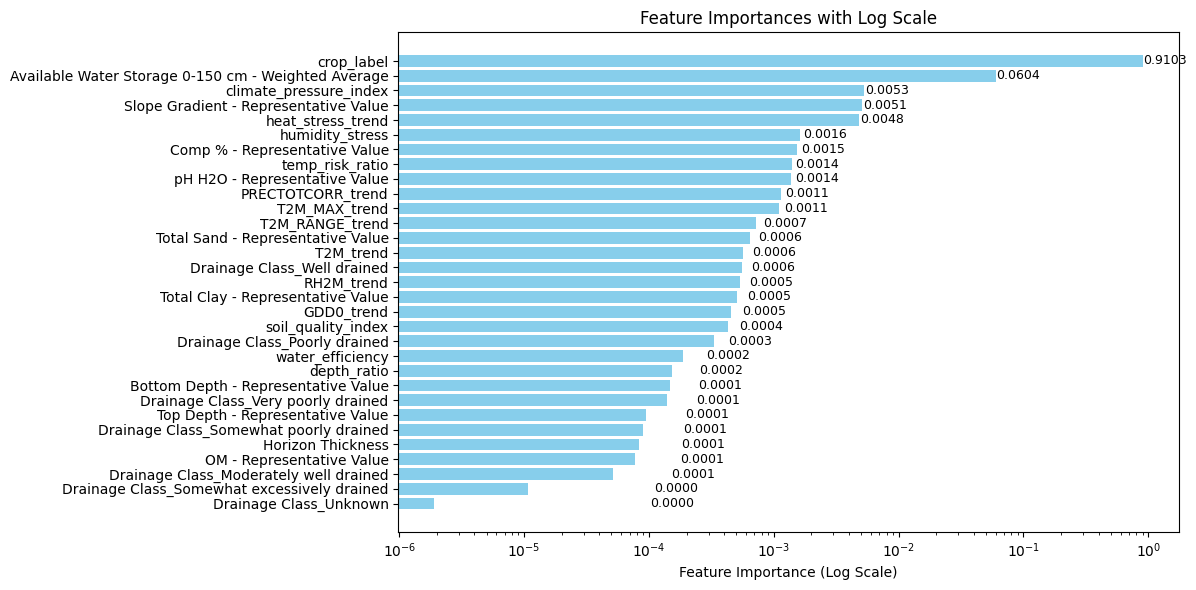

In [64]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(feature_names)), importances[indices], align="center", color="skyblue")
plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance (Log Scale)")
plt.xscale("log")
plt.title("Feature Importances with Log Scale")
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    value = importances[indices][i]
    plt.text(value + 1e-4, bar.get_y() + bar.get_height()/2, f"{value:.4f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


<ipython-input-65-fd349180f076>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


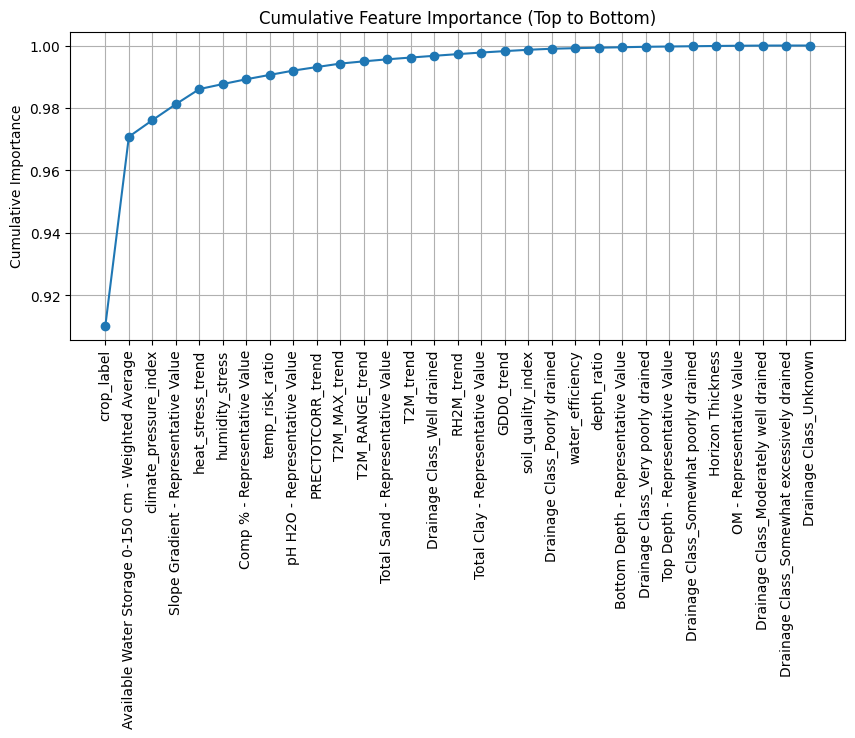

In [65]:
cumulative_importance = np.cumsum(importances[indices])
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(cumulative_importance)+1), cumulative_importance, marker='o')
plt.xticks(range(1, len(cumulative_importance)+1), [feature_names[i] for i in indices], rotation=90)
plt.ylabel("Cumulative Importance")
plt.title("Cumulative Feature Importance (Top to Bottom)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
model_df.to_csv("modeldata.csv", index=False)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X_class = model_df.drop(columns=["nirr_yield_ton_acre", "Crop Name", "latitude", "longitude"])
y_class = model_df["crop_label"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

scaler = StandardScaler()
X_train_scaled_c = scaler.fit_transform(X_train_c)
X_test_scaled_c = scaler.transform(X_test_c)

clf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
clf.fit(X_train_scaled_c, y_train_c)

y_pred_c = clf.predict(X_test_scaled_c)
print("📊 Classification Report:\n")
print(classification_report(y_test_c, y_pred_c))


📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       435
           1       0.98      1.00      0.99       627
           2       0.99      0.96      0.97       499
           3       0.95      0.98      0.97       602
           4       0.92      0.79      0.85       219
           5       0.91      0.98      0.94       584
           6       0.99      0.93      0.96       391
           7       1.00      1.00      1.00       579

    accuracy                           0.97      3936
   macro avg       0.97      0.95      0.96      3936
weighted avg       0.97      0.97      0.97      3936



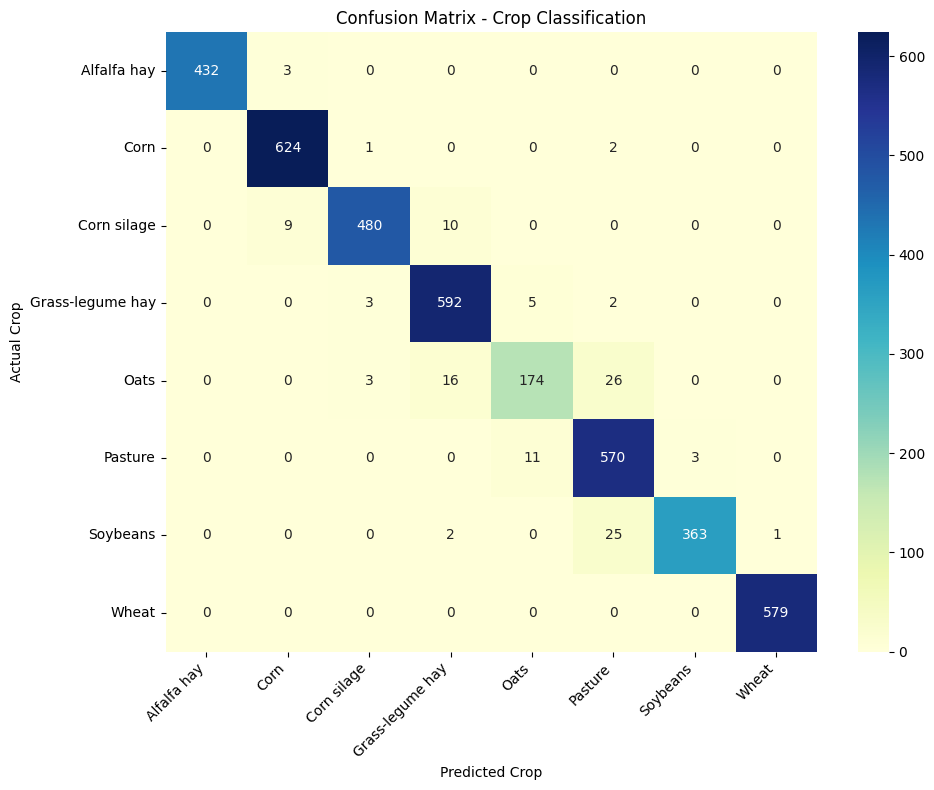

In [67]:
import seaborn as sns

cm = confusion_matrix(y_test_c, y_pred_c)
labels = clf.classes_

from sklearn.preprocessing import LabelEncoder
if "Crop Name" in model_df.columns:
    le = LabelEncoder()
    le.fit(model_df["Crop Name"])
    crop_names = le.inverse_transform(labels)
else:
    crop_names = [f"Crop {i}" for i in labels]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=crop_names, yticklabels=crop_names)
plt.title("Confusion Matrix - Crop Classification")
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [68]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=8, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
xgb_clf.fit(X_train_scaled_c, y_train_c)

y_pred_xgb = xgb_clf.predict(X_test_scaled_c)
print("📊 Classification Report (XGBoost):\n")
print(classification_report(y_test_c, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:16:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       627
           2       1.00      1.00      1.00       499
           3       1.00      1.00      1.00       602
           4       1.00      1.00      1.00       219
           5       1.00      1.00      1.00       584
           6       1.00      1.00      1.00       391
           7       1.00      1.00      1.00       579

    accuracy                           1.00      3936
   macro avg       1.00      1.00      1.00      3936
weighted avg       1.00      1.00      1.00      3936



In [69]:
!pip install cdsapi

In [70]:
import cdsapi

In [71]:
api_content = """
url: https://cds.climate.copernicus.eu/api
key: 7b8a1f61-2e34-497a-8421-f1fd18931f6e

"""
with open("/root/.cdsapirc", "w") as f:
    f.write(api_content)


In [72]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'seasonal-monthly-single-levels',
    {
        'format': 'netcdf',
        'originating_centre': 'ecmwf',
        'system': '51',
        'variable': [
            '2m_temperature',
            'maximum_2m_temperature_in_the_last_24_hours',
            'minimum_2m_temperature_in_the_last_24_hours',
            '2m_dewpoint_temperature',
            'total_precipitation',
            '10m_wind_speed',
            'surface_solar_radiation_downwards',
            'total_column_water_vapour',
            'total_cloud_cover'
        ],
        'product_type': 'ensemble_mean',
        'year': '2025',
        'month': ['04'],
        'leadtime_month': ['1', '2', '3', '4', '5', '6'],
        'area': [40.5, -79.5, 37.5, -74.5],
    },
    'forecast_apr_to_sep_2025_expanded.nc'
)


2025-05-07 16:17:12,552 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 16:17:12,559 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-07 16:17:13,437 INFO Request ID is 63175af1-2c12-4a10-975b-1dc7b4918323
INFO:datapi.legacy_api_client:Request ID is 63175af1-2c12-4a10-975b-1dc7b4918323
2025-05-07 16:17:13,598 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2025-05-07 16:17:35,456 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been upd

ec8376cf05cc998bbbdf46162a6a90af.nc:   0%|          | 0.00/105k [00:00<?, ?B/s]

'forecast_apr_to_sep_2025_expanded.nc'

In [73]:
import xarray as xr

ds = xr.open_dataset("forecast_apr_to_sep_2025_expanded.nc")
ds


<xarray.Dataset> Size: 5kB
Dimensions:                  (forecast_reference_time: 1, forecastMonth: 6,
                              latitude: 4, longitude: 6)
Coordinates:
    number                   int64 8B ...
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 8B 2025...
  * forecastMonth            (forecastMonth) int64 48B 1 2 3 4 5 6
  * latitude                 (latitude) float64 32B 40.5 39.5 38.5 37.5
  * longitude                (longitude) float64 48B -79.5 -78.5 ... -75.5 -74.5
Data variables:
    t2m                      (forecast_reference_time, forecastMonth, latitude, longitude) float32 576B ...
    mx2t24                   (forecast_reference_time, forecastMonth, latitude, longitude) float32 576B ...
    mn2t24                   (forecast_reference_time, forecastMonth, latitude, longitude) float32 576B ...
    d2m                      (forecast_reference_time, forecastMonth, latitude, longitude) float32 576B ...
    tprate                   (forecast_reference_time, forecastMonth, latitude, longitude) float32 576B ...
    si10                     (forecast_reference_time, forecastMonth, latitude, longitude) float32 576B ...
    msdsrf                   (forecast_reference_time, forecastMonth, latitude, longitude) float32 576B ...
    tcwv                     (forecast_reference_time, forecastMonth, latitude, longitude) float32 576B ...
    tcc                      (forecast_reference_time, forecastMonth, latitude, longitude) float32 576B ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-07T16:17 GRIB to CDM+CF via cfgrib-0.9.1...

In [74]:
variables_to_extract = [
    "t2m",            # 2m temperature
    "mx2t24",         # Max 2m temp (24h)
    "mn2t24",         # Min 2m temp (24h)
    "d2m",            # 2m dewpoint temperature
    "tprate",         # Total precipitation rate
    "si10",           # 10m wind speed
    "msdsrf",         # Surface solar radiation downwards
    "tcwv",           # Total column water vapour
    "tcc"             # Total cloud cover
]

ds_avg = ds[variables_to_extract].isel(forecastMonth=slice(0, 6)).mean(dim="forecastMonth")

ds_avg


<xarray.Dataset> Size: 960B
Dimensions:                  (forecast_reference_time: 1, latitude: 4,
                              longitude: 6)
Coordinates:
    number                   int64 8B ...
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 8B 2025...
  * latitude                 (latitude) float64 32B 40.5 39.5 38.5 37.5
  * longitude                (longitude) float64 48B -79.5 -78.5 ... -75.5 -74.5
Data variables:
    t2m                      (forecast_reference_time, latitude, longitude) float32 96B ...
    mx2t24                   (forecast_reference_time, latitude, longitude) float32 96B ...
    mn2t24                   (forecast_reference_time, latitude, longitude) float32 96B ...
    d2m                      (forecast_reference_time, latitude, longitude) float32 96B ...
    tprate                   (forecast_reference_time, latitude, longitude) float32 96B ...
    si10                     (forecast_reference_time, latitude, longitude) float32 96B ...
    msdsrf                   (forecast_reference_time, latitude, longitude) float32 96B ...
    tcwv                     (forecast_reference_time, latitude, longitude) float32 96B ...
    tcc                      (forecast_reference_time, latitude, longitude) float32 96B ...

In [77]:
import pandas as pd
from scipy.interpolate import griddata
import numpy as np

soil_points = pd.read_csv("latlon_MD.csv")
grid_lat = ds_avg.latitude.values
grid_lon = ds_avg.longitude.values
grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat)

grid_coords = np.column_stack([grid_lat.ravel(), grid_lon.ravel()])

forecast = soil_points.copy()

for var in ds_avg.data_vars:
    values = ds_avg[var].values.ravel()
    interpolated = griddata(grid_coords, values, (soil_points["latitude"], soil_points["longitude"]), method="linear")
    forecast[var + "_2025"] = interpolated

forecast.head()


,Mapunit Key,latitude,longitude,t2m_2025,mx2t24_2025,mn2t24_2025,d2m_2025,tprate_2025,si10_2025,msdsrf_2025,tcwv_2025,tcc_2025
0,534127,39.474355,-77.655944,292.678514,298.287767,288.005689,287.376854,3.693143e-08,2.358350,225.318887,29.206826,0.592787
1,534131,39.669267,-77.934244,292.012283,297.576688,287.338715,287.056753,3.718793e-08,2.294058,222.804815,28.251497,0.602715
2,534133,39.584099,-77.593210,292.588845,298.175597,287.925042,287.314336,3.707755e-08,2.364596,224.874123,29.080263,0.593891
3,534135,39.522857,-77.626552,292.649239,298.247077,287.983122,287.353378,3.698027e-08,2.366486,225.168759,29.163501,0.592984
4,534141,39.690459,-78.236861,291.591942,297.146893,286.908648,286.878390,3.720140e-08,2.238335,221.357073,27.644494,0.609162


In [91]:
forecast.to_csv("forecast_2025.csv", index=False)

In [78]:
# @title
kelvin_cols = [
    "t2m_2025",             # 2m temperature
    "mx2t24_2025",          # max temp in last 24h
    "mn2t24_2025",          # min temp in last 24h
    "d2m_2025"              # dewpoint temperature
]

for col in kelvin_cols:
    if col in forecast.columns:
        forecast[col] = forecast[col] - 273.15

forecast.to_csv("forecast_2025_celsius.csv", index=False)
forecast[["latitude", "longitude"] + kelvin_cols].head()


,latitude,longitude,t2m_2025,mx2t24_2025,mn2t24_2025,d2m_2025
0,39.474355,-77.655944,19.528514,25.137767,14.855689,14.226854
1,39.669267,-77.934244,18.862283,24.426688,14.188715,13.906753
2,39.584099,-77.593210,19.438845,25.025597,14.775042,14.164336
3,39.522857,-77.626552,19.499239,25.097077,14.833122,14.203378
4,39.690459,-78.236861,18.441942,23.996893,13.758648,13.728390


In [79]:
# @title
# Adjust non-temperature units
forecast["tprate_2025"] = forecast["tprate_2025"] * 86400 * 30  # kg/m2/s to mm/month
forecast["msdsrf_2025"] = forecast["msdsrf_2025"] * 86400 * 30 / 1e6  # J/m²/s to MJ/m²/month
forecast["tcc_2025"] = forecast["tcc_2025"] * 100  # 0–1 to percentage


In [80]:
# @title
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mapunit Key  304 non-null    int64  
 1   latitude     304 non-null    float64
 2   longitude    304 non-null    float64
 3   t2m_2025     304 non-null    float64
 4   mx2t24_2025  304 non-null    float64
 5   mn2t24_2025  304 non-null    float64
 6   d2m_2025     304 non-null    float64
 7   tprate_2025  304 non-null    float64
 8   si10_2025    304 non-null    float64
 9   msdsrf_2025  304 non-null    float64
 10  tcwv_2025    304 non-null    float64
 11  tcc_2025     304 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 28.6 KB


In [81]:
# @title
# 🔹 Step 2: Derived climate indicators (same as historical)
forecast["GDD0"] = forecast["t2m_2025"].clip(lower=0)  # base 0°C growing degree days
forecast["heat_stress"] = (forecast["mx2t24_2025"] > 35).astype(int)  # days > 35°C
forecast["cold_stress"] = (forecast["mn2t24_2025"] < 10).astype(int)  # days < 10°C

In [82]:
# @title
forecast["year"] = 2025

In [83]:
# @title
# 🔹 Step 4: Rename columns to match 2021–24 structure
forecast = forecast.rename(columns={
    "t2m_2025": "T2M",
    "mx2t24_2025": "T2M_MAX",
    "mn2t24_2025": "T2M_MIN",
    "d2m_2025": "RH2M",  # dewpoint as RH proxy
    "tprate_2025": "PRECTOTCORR",
    "si10_2025": "WS2M",
    "msdsrf_2025": "ALLSKY_SFC_SW_DWN",
    "tcwv_2025": "QV2M",
    "tcc_2025" : "ALLSKY_SFC_SW_DIFF",
    "GDD0": "GDD0",
    "heat_stress": "heat_stress",
    "cold_stress": "cold_stress"
})

In [84]:
# @title
# Optional if missing
forecast["T2M_RANGE"] = forecast["T2M_MAX"] - forecast["T2M_MIN"]
forecast["ALLSKY_SFC_SW_DIFF"] = 0.0  # placeholder
forecast["ALLSKY_SFC_SW_DNI"] = 0.0   # placeholder


In [85]:
# @title
trend_features = [
    "T2M", "T2M_MAX", "T2M_MIN", "T2M_RANGE",
    "RH2M", "QV2M", "PRECTOTCORR",
    "ALLSKY_SFC_SW_DWN", "ALLSKY_SFC_SW_DIFF", "ALLSKY_SFC_SW_DNI",
    "WS2M", "GDD0", "heat_stress", "cold_stress"
]

In [86]:
# @title
climate_trend_2025_df = forecast[["latitude", "longitude"] + trend_features].copy()
climate_trend_2025_df.columns = [col + "_trend" if col not in ["latitude", "longitude"] else col for col in climate_trend_2025_df.columns]

# 🔹 Step 6: Normalize the trends
trend_cols = [col for col in climate_trend_2025_df.columns if col.endswith("_trend")]

scaler = MinMaxScaler()
trend_norm = scaler.fit_transform(climate_trend_2025_df[trend_cols])

# 🔹 Step 7: Calculate CPI and attach normalized columns
climate_trend_2025_df["climate_pressure_index_2025"] = trend_norm.mean(axis=1)

normalized_cols = pd.DataFrame(trend_norm, columns=[col + "_norm" for col in trend_cols])
climate_trend_2025_df = pd.concat([climate_trend_2025_df.reset_index(drop=True), normalized_cols], axis=1)

# ✅ Done — Preview
climate_trend_2025_df[["latitude", "longitude", "climate_pressure_index_2025"] + trend_cols].head()

,latitude,longitude,climate_pressure_index_2025,T2M_trend,T2M_MAX_trend,T2M_MIN_trend,T2M_RANGE_trend,RH2M_trend,QV2M_trend,PRECTOTCORR_trend,ALLSKY_SFC_SW_DWN_trend,ALLSKY_SFC_SW_DIFF_trend,ALLSKY_SFC_SW_DNI_trend,WS2M_trend,GDD0_trend,heat_stress_trend,cold_stress_trend
0,39.474355,-77.655944,0.289269,19.528514,25.137767,14.855689,10.282077,14.226854,29.206826,0.095726,584.026554,0.0,0.0,2.358350,19.528514,0,0
1,39.669267,-77.934244,0.222490,18.862283,24.426688,14.188715,10.237973,13.906753,28.251497,0.096391,577.510080,0.0,0.0,2.294058,18.862283,0,0
2,39.584099,-77.593210,0.280371,19.438845,25.025597,14.775042,10.250555,14.164336,29.080263,0.096105,582.873728,0.0,0.0,2.364596,19.438845,0,0
3,39.522857,-77.626552,0.286307,19.499239,25.097077,14.833122,10.263955,14.203378,29.163501,0.095853,583.637423,0.0,0.0,2.366486,19.499239,0,0
4,39.690459,-78.236861,0.180193,18.441942,23.996893,13.758648,10.238245,13.728390,27.644494,0.096426,573.757532,0.0,0.0,2.238335,18.441942,0,0


In [87]:
# @title
import pandas as pd

# Step 1: Set matching index for comparison
df_2024 = climate_trend_df.set_index(["latitude", "longitude"])
df_2025 = climate_trend_2025_df.set_index(["latitude", "longitude"])

# Step 2: Ensure only common locations
common_index = df_2024.index.intersection(df_2025.index)
df_2024 = df_2024.loc[common_index]
df_2025 = df_2025.loc[common_index]

# Step 3: Extract only trend columns (excluding CPI and normalized)
trend_cols = [col for col in df_2024.columns if col.endswith("_trend") and "_norm" not in col]

# Step 4: Compute difference between years
diff_df = df_2025[trend_cols].subtract(df_2024[trend_cols])

# Step 5: Summary statistics
summary_stats = pd.DataFrame({
    "2024_Mean": df_2024[trend_cols].mean(),
    "2025_Mean": df_2025[trend_cols].mean(),
    "2024_Median": df_2024[trend_cols].median(),
    "2025_Median": df_2025[trend_cols].median(),
    "Mean_Diff": diff_df.mean(),
    "Median_Diff": diff_df.median(),
    "Max_Diff": diff_df.max(),
    "Min_Diff": diff_df.min(),
    "Abs_Mean_Diff": diff_df.abs().mean()
}).round(3)


In [88]:
# @title
summary_stats

,2024_Mean,2025_Mean,2024_Median,2025_Median,Mean_Diff,Median_Diff,Max_Diff,Min_Diff,Abs_Mean_Diff
T2M_trend,0.135,19.521,0.119,19.418,19.386,19.299,21.895,17.134,19.386
T2M_MAX_trend,0.204,24.798,0.175,24.916,24.594,24.750,25.699,22.179,24.594
T2M_MIN_trend,0.095,15.146,0.096,14.751,15.051,14.661,19.467,12.918,15.051
T2M_RANGE_trend,0.109,9.652,0.078,10.235,9.544,10.157,10.256,5.290,9.544
RH2M_trend,-0.701,14.403,-0.653,14.162,15.104,14.816,17.098,14.202,15.104
QV2M_trend,-0.077,29.182,-0.082,29.047,29.259,29.129,32.732,25.842,29.259
PRECTOTCORR_trend,-0.185,0.100,-0.168,0.096,0.286,0.265,0.504,0.142,0.286
ALLSKY_SFC_SW_DWN_trend,0.109,584.380,0.065,582.809,584.272,582.744,634.129,564.996,584.272
ALLSKY_SFC_SW_DIFF_trend,-131.082,0.000,-131.075,0.000,131.082,131.075,131.120,131.056,131.082
ALLSKY_SFC_SW_DNI_trend,-132.106,0.000,-132.112,0.000,132.106,132.112,132.704,131.896,132.106


In [89]:
climate_trend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       304 non-null    float64
 1   longitude                      304 non-null    float64
 2   T2M_trend                      304 non-null    float64
 3   T2M_MAX_trend                  304 non-null    float64
 4   T2M_MIN_trend                  304 non-null    float64
 5   T2M_RANGE_trend                304 non-null    float64
 6   RH2M_trend                     304 non-null    float64
 7   QV2M_trend                     304 non-null    float64
 8   PRECTOTCORR_trend              304 non-null    float64
 9   ALLSKY_SFC_SW_DWN_trend        304 non-null    float64
 10  ALLSKY_SFC_SW_DIFF_trend       304 non-null    float64
 11  ALLSKY_SFC_SW_DNI_trend        304 non-null    float64
 12  WS2M_trend                     304 non-null    flo

In [94]:
import pandas as pd

forecast = pd.read_csv("forecast_2025_celsius.csv")

forecast = forecast.rename(columns={
    "t2m_2025": "T2M",
    "mx2t24_2025": "T2M_MAX",
    "mn2t24_2025": "T2M_MIN",
    "d2m_2025": "RH2M",
    "tprate_2025": "PRECTOTCORR",
    "si10_2025": "WS2M",
    "msdsrf_2025": "ALLSKY_SFC_SW_DWN",
    "tcwv_2025": "QV2M",
    "tcc_2025": "cloudiness"
})

forecast["T2M_RANGE"] = forecast["T2M_MAX"] - forecast["T2M_MIN"]
forecast["GDD0"] = forecast["T2M"].clip(lower=0) * 180
forecast["heat_stress"] = (forecast["T2M_MAX"] > 35).astype(int)
forecast["cold_stress"] = (forecast["T2M_MIN"] < 10).astype(int)

forecast["ALLSKY_SFC_SW_DIFF"] = forecast["cloudiness"]
forecast["ALLSKY_SFC_SW_DNI"] = forecast["cloudiness"]

trend_cols = [
    "T2M", "T2M_MAX", "T2M_MIN", "T2M_RANGE",
    "RH2M", "QV2M", "PRECTOTCORR",
    "ALLSKY_SFC_SW_DWN", "ALLSKY_SFC_SW_DIFF",
    "WS2M", "GDD0", "heat_stress", "cold_stress"
]
trend_2024_cols = [col + "_trend" for col in trend_cols]

forecast_df = forecast.set_index(["latitude", "longitude"])
baseline_df = climate_trend_df.set_index(["latitude", "longitude"])

common_idx = forecast_df.index.intersection(baseline_df.index)
forecast_df = forecast_df.loc[common_idx]
baseline_df = baseline_df.loc[common_idx]

if all(col in forecast_df.columns for col in trend_cols) and all(col in baseline_df.columns for col in trend_2024_cols):
  forecast_2025_trend = pd.DataFrame(forecast_df[trend_cols].values - baseline_df[trend_2024_cols].values,columns=[col + "_approx_trend" for col in trend_cols],index=forecast_df.index)
  forecast_2025_trend.columns = [col + "_approx_trend" for col in trend_cols]
  result_df = pd.concat([forecast_df.reset_index()[["latitude", "longitude"]], forecast_2025_trend.reset_index(drop=True)], axis=1)
  print("Recomputed pseudo-trends for 2025:")
  display(result_df.head())
else:
  print("Column mismatch: Please verify forecast and baseline trend columns.")


✅ Recomputed pseudo-trends for 2025:


,latitude,longitude,T2M_approx_trend,T2M_MAX_approx_trend,T2M_MIN_approx_trend,T2M_RANGE_approx_trend,RH2M_approx_trend,QV2M_approx_trend,PRECTOTCORR_approx_trend,ALLSKY_SFC_SW_DWN_approx_trend,ALLSKY_SFC_SW_DIFF_approx_trend,WS2M_approx_trend,GDD0_approx_trend,heat_stress_approx_trend,cold_stress_approx_trend
0,39.474355,-77.655944,19.409986,24.972795,14.765432,10.207362,14.880111,29.288531,0.168402,225.161602,131.668137,2.369570,3515.013988,-2.3,4.3
1,39.669267,-77.934244,18.744582,24.252020,14.092308,10.159712,14.492248,28.315969,0.106220,222.739815,131.678066,2.292647,3395.093391,-2.1,4.2
2,39.584099,-77.593210,19.320317,24.860625,14.684785,10.175840,14.817593,29.161969,0.168402,224.809123,131.669242,2.375815,3498.873641,-2.3,4.3
3,39.522857,-77.626552,19.380711,24.932105,14.742865,10.189240,14.856635,29.245206,0.168402,225.103759,131.668335,2.377706,3509.744529,-2.3,4.3
4,39.690459,-78.236861,18.324241,23.822225,13.662241,10.159984,14.313886,27.708966,0.106220,221.149194,131.669181,2.236924,3319.432035,-2.1,4.2


In [95]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

approx_trend_cols = [col for col in result_df.columns if col.endswith("_approx_trend")]
scaler_2025 = MinMaxScaler()
norm_values = scaler_2025.fit_transform(result_df[approx_trend_cols])

norm_colnames = [col.replace("_approx_trend", "_approx_trend_norm") for col in approx_trend_cols]
norm_df = pd.DataFrame(norm_values, columns=norm_colnames)

df_cpi_2025 = pd.concat([result_df.reset_index(drop=True), norm_df], axis=1)
df_cpi_2025["climate_pressure_index_2025"] = df_cpi_2025[norm_colnames].mean(axis=1)
df_cpi_2025[["latitude", "longitude", "climate_pressure_index_2025"] + norm_colnames].head()


,latitude,longitude,climate_pressure_index_2025,T2M_approx_trend_norm,T2M_MAX_approx_trend_norm,T2M_MIN_approx_trend_norm,T2M_RANGE_approx_trend_norm,RH2M_approx_trend_norm,QV2M_approx_trend_norm,PRECTOTCORR_approx_trend_norm,ALLSKY_SFC_SW_DWN_approx_trend_norm,ALLSKY_SFC_SW_DIFF_approx_trend_norm,WS2M_approx_trend_norm,GDD0_approx_trend_norm,heat_stress_approx_trend_norm,cold_stress_approx_trend_norm
0,39.474355,-77.655944,0.503063,0.478108,0.793766,0.282024,0.990175,0.234150,0.500241,0.359533,0.274964,0.571437,0.060329,0.474262,0.520833,1.00000
1,39.669267,-77.934244,0.422336,0.338339,0.588985,0.179241,0.980581,0.100224,0.359098,0.179449,0.184876,0.691733,0.027869,0.328718,0.562500,0.96875
2,39.584099,-77.593210,0.493371,0.459273,0.761897,0.269710,0.983828,0.212563,0.481873,0.359533,0.261852,0.584817,0.062965,0.454673,0.520833,1.00000
3,39.522857,-77.626552,0.499838,0.471958,0.782205,0.278578,0.986527,0.226044,0.493953,0.359533,0.272812,0.573825,0.063762,0.467866,0.520833,1.00000
4,39.690459,-78.236861,0.367884,0.250045,0.466874,0.113572,0.980636,0.038637,0.271008,0.179449,0.125706,0.584077,0.004355,0.236890,0.562500,0.96875


In [96]:
climate_trend_df.head()

,latitude,longitude,T2M_trend,T2M_MAX_trend,T2M_MIN_trend,T2M_RANGE_trend,RH2M_trend,QV2M_trend,PRECTOTCORR_trend,ALLSKY_SFC_SW_DWN_trend,...,PRECTOTCORR_trend_norm,ALLSKY_SFC_SW_DWN_trend_norm,ALLSKY_SFC_SW_DIFF_trend_norm,ALLSKY_SFC_SW_DNI_trend_norm,WS2M_trend_norm,GDD0_trend_norm,heat_stress_trend_norm,cold_stress_trend_norm,temp_risk_ratio,humidity_stress
0,38.128498,-75.702402,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.041192,...,0.000000,0.207880,1.000000,0.000000,0.185965,0.022305,0.0625,0.84375,3.620582,-0.009186
1,38.158015,-75.681655,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.041192,...,0.000000,0.207880,1.000000,0.000000,0.185965,0.022305,0.0625,0.84375,3.620582,-0.009186
2,38.198891,-75.377198,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.005864,...,0.000000,0.281907,1.000000,0.000000,0.185965,0.022305,0.0625,0.84375,3.620582,-0.009186
3,38.207234,-75.377967,0.040061,0.145079,0.021350,0.123729,-0.030621,-0.039458,-0.389551,-0.005864,...,0.000000,0.281907,1.000000,0.000000,0.185965,0.022305,0.0625,0.84375,3.620582,-0.009186
4,38.474777,-76.574228,0.180164,0.260645,0.141944,0.118701,-0.621383,-0.058654,-0.345168,-0.136752,...,0.128537,0.007638,0.541935,0.074546,0.695186,0.788324,1.0000,0.43750,1.446632,-2.982639


In [240]:
cpi_2024 = climate_trend_df.set_index(["latitude", "longitude"])[["climate_pressure_index"]]
cpi_2025 = df_cpi_2025.set_index(["latitude", "longitude"])[["climate_pressure_index_2025"]]

cpi_compare = cpi_2024.join(cpi_2025, how="inner")

cpi_compare["cpi_shift"] = cpi_compare["climate_pressure_index_2025"] - cpi_compare["climate_pressure_index"]

summary = {
    "2021–24 CPI (avg)": round(cpi_compare["climate_pressure_index"].mean(), 4),
    "2025 CPI (avg)": round(cpi_compare["climate_pressure_index_2025"].mean(), 4),
    "Avg CPI Change": round(cpi_compare["cpi_shift"].mean(), 4),
    "Max CPI Increase": round(cpi_compare["cpi_shift"].max(), 4),
    "Max CPI Decrease": round(cpi_compare["cpi_shift"].min(), 4)
}

print("Climate Pressure Index Summary:")
for k, v in summary.items():
    print(f"{k}: {v}")

cpi_compare_sorted = cpi_compare.sort_values("cpi_shift", ascending=False)
cpi_compare_sorted.head()


Climate Pressure Index Summary:
2021–24 CPI (avg): 0.4947
2025 CPI (avg): 0.4907
Avg CPI Change: -0.004
Max CPI Increase: 0.4139
Max CPI Decrease: -0.4383


,,climate_pressure_index,climate_pressure_index_2025,cpi_shift
latitude,longitude,,,
38.128498,-75.702402,0.337821,0.751716,0.413895
38.158015,-75.681655,0.337821,0.748451,0.410630
38.198891,-75.377198,0.343109,0.749399,0.406290
38.207234,-75.377967,0.343109,0.748404,0.405296
39.271930,-75.926575,0.337332,0.627889,0.290557


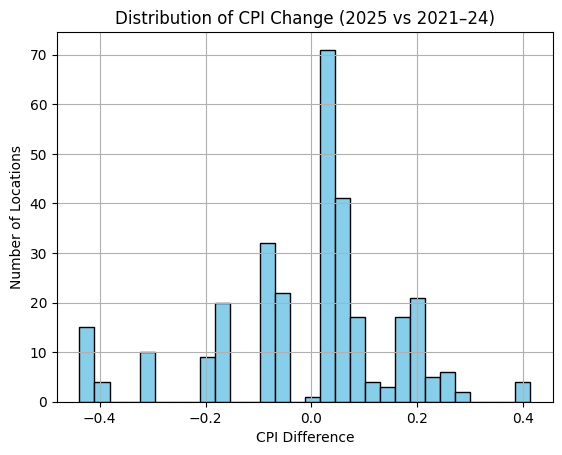

In [98]:
import matplotlib.pyplot as plt

plt.hist(cpi_compare["cpi_shift"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of CPI Change (2025 vs 2021–24)")
plt.xlabel("CPI Difference")
plt.ylabel("Number of Locations")
plt.grid(True)
plt.show()


In [99]:
threshold = 0.25

high_variance_locations = cpi_compare[abs(cpi_compare["cpi_shift"]) > threshold].copy()
high_variance_locations = high_variance_locations.reset_index()
high_variance_locations.sort_values("cpi_shift", ascending=False).head(10)


,latitude,longitude,climate_pressure_index,climate_pressure_index_2025,cpi_shift
0,38.128498,-75.702402,0.337821,0.751716,0.413895
1,38.158015,-75.681655,0.337821,0.748451,0.410630
2,38.198891,-75.377198,0.343109,0.749399,0.406290
3,38.207234,-75.377967,0.343109,0.748404,0.405296
4,39.271930,-75.926575,0.337332,0.627889,0.290557
5,39.335467,-75.764116,0.337332,0.626701,0.289369
18,39.569491,-75.825869,0.321828,0.588988,0.267160
25,39.606621,-75.849251,0.321828,0.580358,0.258530
23,39.595479,-75.928339,0.321828,0.579262,0.257433
26,39.612633,-75.850443,0.321828,0.579071,0.257243


In [241]:
print(f" Total high-variance locations (|CPI shift| > {threshold}): {len(high_variance_locations)}")

print("⬆ Max CPI Increase Location:")
print(high_variance_locations.loc[high_variance_locations["cpi_shift"].idxmax()])

print("\n⬇ Max CPI Decrease Location:")
print(high_variance_locations.loc[high_variance_locations["cpi_shift"].idxmin()])


 Total high-variance locations (|CPI shift| > -1): 41
⬆ Max CPI Increase Location:
latitude                       38.128498
longitude                     -75.702402
climate_pressure_index          0.337821
climate_pressure_index_2025     0.751716
cpi_shift                       0.413895
Name: 0, dtype: float64

⬇ Max CPI Decrease Location:
latitude                       39.476058
longitude                     -79.373055
climate_pressure_index          0.714584
climate_pressure_index_2025     0.276304
cpi_shift                      -0.438280
Name: 8, dtype: float64


In [101]:
import folium

m = folium.Map(location=[39.0, -76.5], zoom_start=8, tiles='CartoDB positron')

for _, row in high_variance_locations.iterrows():
    color = "red" if row["cpi_shift"] > 0 else "blue"
    popup_text = f"""
    <b>Lat:</b> {row['latitude']}<br>
    <b>Lon:</b> {row['longitude']}<br>
    <b>CPI 2021–24:</b> {row['climate_pressure_index']:.3f}<br>
    <b>CPI 2025:</b> {row['climate_pressure_index_2025']:.3f}<br>
    <b>Shift:</b> {row['cpi_shift']:.3f}
    """
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=6,
        color=color,
        fill=True,
        fill_opacity=0.8,
        popup=folium.Popup(popup_text, max_width=250)
    ).add_to(m)

m


In [220]:
climate_trend_2025_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       304 non-null    float64
 1   longitude                      304 non-null    float64
 2   T2M_trend                      304 non-null    float64
 3   T2M_MAX_trend                  304 non-null    float64
 4   T2M_MIN_trend                  304 non-null    float64
 5   T2M_RANGE_trend                304 non-null    float64
 6   RH2M_trend                     304 non-null    float64
 7   QV2M_trend                     304 non-null    float64
 8   PRECTOTCORR_trend              304 non-null    float64
 9   ALLSKY_SFC_SW_DWN_trend        304 non-null    float64
 10  ALLSKY_SFC_SW_DIFF_trend       304 non-null    float64
 11  ALLSKY_SFC_SW_DNI_trend        304 non-null    float64
 12  WS2M_trend                     304 non-null    flo

In [102]:
cpi_shift_df = cpi_compare.reset_index()
high_cpi_df = cpi_shift_df[cpi_shift_df["cpi_shift"] > 0.25]


In [103]:
climate_trend_2025_df["temp_risk_ratio"] = climate_trend_2025_df["T2M_MAX_trend"] / (climate_trend_2025_df["T2M_trend"] + 1e-5)
climate_trend_2025_df["humidity_stress"] = climate_trend_2025_df["RH2M_trend"] * climate_trend_2025_df["heat_stress_trend"]

In [105]:
climate_selected_cols = [
    "latitude", "longitude",
    "T2M_trend", "T2M_MAX_trend", "T2M_RANGE_trend",
    "RH2M_trend", "PRECTOTCORR_trend",
    "GDD0_trend", "heat_stress_trend",
    "climate_pressure_index_2025", "temp_risk_ratio", "humidity_stress"
]


In [106]:
Climate_2025 = climate_trend_2025_df[climate_selected_cols]

In [153]:
soil_df_final = soil_df[soil_selected_cols]

forecast_model_df = pd.merge(
    soil_df_final,
    Climate_2025,
    on=["latitude", "longitude"],
    how="inner"
)

In [154]:
forecast_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19680 entries, 0 to 19679
Data columns (total 28 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   latitude                                             19680 non-null  float64
 1   longitude                                            19680 non-null  float64
 2   Comp % - Representative Value                        19680 non-null  int64  
 3   Slope Gradient - Representative Value                19680 non-null  float64
 4   Drainage Class                                       19680 non-null  object 
 5   Top Depth - Representative Value                     19680 non-null  int64  
 6   Bottom Depth - Representative Value                  19680 non-null  int64  
 7   Horizon Thickness                                    19680 non-null  int64  
 8   depth_ratio                                          19680 non-nul

In [109]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19680 entries, 0 to 19679
Data columns (total 35 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   latitude                                             19680 non-null  float64
 1   longitude                                            19680 non-null  float64
 2   Comp % - Representative Value                        19680 non-null  int64  
 3   Slope Gradient - Representative Value                19680 non-null  float64
 4   Top Depth - Representative Value                     19680 non-null  int64  
 5   Bottom Depth - Representative Value                  19680 non-null  int64  
 6   Horizon Thickness                                    19680 non-null  int64  
 7   depth_ratio                                          19680 non-null  float64
 8   pH H2O - Representative Value                        19680 non-nul

In [155]:
forecast_model_df['Crop Name'].unique()

array(['Pasture', 'Corn silage', 'Oats', 'Grass-legume hay', 'Wheat',
       'Corn', 'Soybeans', 'Alfalfa hay'], dtype=object)

In [170]:
forecast_cpi = pd.merge(
    high_cpi_df[['latitude', 'longitude']],
    forecast_model_df,
    on=['latitude', 'longitude'],
    how='left'
)

In [171]:
forecast_cpi['Crop Name'].unique()

array(['Pasture', 'Soybeans', 'Wheat', 'Corn', 'Corn silage',
       'Grass-legume hay', 'Alfalfa hay', nan], dtype=object)

In [172]:
forecast_cpi["climate_pressure_index"] = forecast_cpi["climate_pressure_index_2025"]

In [173]:
forecast_cpi.drop(columns=["climate_pressure_index_2025"], inplace=True)

In [175]:
forecast_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 28 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   latitude                                             397 non-null    float64
 1   longitude                                            397 non-null    float64
 2   Comp % - Representative Value                        393 non-null    float64
 3   Slope Gradient - Representative Value                393 non-null    float64
 4   Drainage Class                                       393 non-null    object 
 5   Top Depth - Representative Value                     393 non-null    float64
 6   Bottom Depth - Representative Value                  393 non-null    float64
 7   Horizon Thickness                                    393 non-null    float64
 8   depth_ratio                                          393 non-null    f

In [176]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(forecast_cpi[["Drainage Class"]])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Drainage Class"]))

forecast_cpi = pd.concat([forecast_cpi.drop(columns=["Drainage Class"]), encoded_df], axis=1)


In [177]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
forecast_cpi["crop_label"] = le.fit_transform(forecast_cpi["Crop Name"])

In [178]:
forecast_cpi['crop_label'].unique()

array([4, 5, 6, 1, 2, 3, 0, 7])

In [180]:
forecast_cpi.rename(columns={"Drainage Class_nan": "Drainage Class_Unknown"}, inplace=True)


In [181]:
forecast_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   latitude                                             397 non-null    float64
 1   longitude                                            397 non-null    float64
 2   Comp % - Representative Value                        393 non-null    float64
 3   Slope Gradient - Representative Value                393 non-null    float64
 4   Top Depth - Representative Value                     393 non-null    float64
 5   Bottom Depth - Representative Value                  393 non-null    float64
 6   Horizon Thickness                                    393 non-null    float64
 7   depth_ratio                                          393 non-null    float64
 8   pH H2O - Representative Value                        393 non-null    f

In [182]:
expected_drainage_cols = [
    'Drainage Class_Moderately well drained',
    'Drainage Class_Poorly drained',
    'Drainage Class_Somewhat excessively drained',
    'Drainage Class_Somewhat poorly drained',
    'Drainage Class_Unknown',
    'Drainage Class_Very poorly drained',
    'Drainage Class_Well drained'
]

for col in expected_drainage_cols:
    if col not in forecast_cpi.columns:
        forecast_cpi[col] = 0


In [183]:
X_forecast = forecast_cpi.drop(columns=["nirr_yield_ton_acre", "Crop Name", "latitude", "longitude"])

In [184]:
X_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 31 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Comp % - Representative Value                        393 non-null    float64
 1   Slope Gradient - Representative Value                393 non-null    float64
 2   Top Depth - Representative Value                     393 non-null    float64
 3   Bottom Depth - Representative Value                  393 non-null    float64
 4   Horizon Thickness                                    393 non-null    float64
 5   depth_ratio                                          393 non-null    float64
 6   pH H2O - Representative Value                        393 non-null    float64
 7   OM - Representative Value                            393 non-null    float64
 8   Total Sand - Representative Value                    393 non-null    f

In [185]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19680 entries, 0 to 19679
Data columns (total 31 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Comp % - Representative Value                        19680 non-null  int64  
 1   Slope Gradient - Representative Value                19680 non-null  float64
 2   Top Depth - Representative Value                     19680 non-null  int64  
 3   Bottom Depth - Representative Value                  19680 non-null  int64  
 4   Horizon Thickness                                    19680 non-null  int64  
 5   depth_ratio                                          19680 non-null  float64
 6   pH H2O - Representative Value                        19680 non-null  float64
 7   OM - Representative Value                            19680 non-null  float64
 8   Total Sand - Representative Value                    19680 non-nul

In [186]:
import joblib

model = joblib.load("trained_yield_model.pkl")
forecast_cpi["predicted_yield"] = model.predict(X_forecast)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [187]:
forecast_cpi['predicted_yield'].unique()

array([7.        , 1.33846448, 1.33792017, 1.35513578, 1.35264927,
       1.35450642, 1.35387397, 3.22002677])

In [190]:
from sklearn.preprocessing import LabelEncoder

crop_encoder = LabelEncoder()
crop_encoder.fit(forecast_cpi["Crop Name"])

forecast_cpi["crop_name_decoded"] = crop_encoder.inverse_transform(forecast_cpi["crop_label"])


In [ ]:
forecast_cpi

In [217]:
forecast_cpi.groupby(["latitude", "longitude"]).nunique()

,,Comp % - Representative Value,Slope Gradient - Representative Value,Top Depth - Representative Value,Bottom Depth - Representative Value,Horizon Thickness,depth_ratio,pH H2O - Representative Value,OM - Representative Value,Total Sand - Representative Value,Total Clay - Representative Value,...,Drainage Class_Moderately well drained,Drainage Class_Poorly drained,Drainage Class_Somewhat excessively drained,Drainage Class_Somewhat poorly drained,Drainage Class_Well drained,Drainage Class_Unknown,crop_label,Drainage Class_Very poorly drained,predicted_yield,crop_name_decoded
latitude,longitude,,,,,,,,,,,,,,,,,,,,,
38.128498,-75.702402,2,1,10,10,8,10,7,6,15,14,...,2,1,1,2,1,1,6,1,3,6
38.158015,-75.681655,2,1,10,10,8,10,7,6,15,14,...,2,1,1,2,1,1,6,1,5,6
38.198891,-75.377198,4,1,19,19,19,20,12,13,4,10,...,1,1,2,1,2,1,3,1,1,3
38.207234,-75.377967,4,1,18,18,19,20,12,12,4,10,...,1,1,2,1,2,1,3,1,1,3
39.271930,-75.926575,1,1,3,3,3,3,1,2,7,4,...,1,1,1,1,1,1,3,1,1,3
39.335467,-75.764116,2,1,5,5,5,5,5,4,7,9,...,1,1,1,1,1,1,4,1,1,4
39.569491,-75.825869,2,1,5,5,5,5,5,4,7,9,...,1,1,1,1,1,1,4,1,1,4
39.595479,-75.928339,2,1,5,5,5,5,5,4,7,9,...,1,1,1,1,1,1,4,1,1,4
39.606621,-75.849251,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [216]:
crop_count_per_location = forecast_cpi.groupby(["latitude", "longitude"])["Crop Name"].nunique().reset_index()
crop_count_per_location.rename(columns={"Crop Name": "num_crops"}, inplace=True)
print(crop_count_per_location)

     latitude  longitude  num_crops
0   38.128498 -75.702402          6
1   38.158015 -75.681655          6
2   38.198891 -75.377198          3
3   38.207234 -75.377967          3
4   39.271930 -75.926575          3
5   39.335467 -75.764116          4
6   39.569491 -75.825869          4
7   39.595479 -75.928339          4
8   39.606621 -75.849251          0
9   39.612633 -75.850443          0
10  39.612753 -75.894589          0
11  39.624146 -75.852570          0


In [189]:
# valid_rows = forecast_cpi["crop_label"].notna()
# forecast_cpi.loc[valid_rows, "crop_name_decoded"] = crop_encoder.inverse_transform(forecast_cpi.loc[valid_rows, "crop_label"].astype(int))


In [191]:
predicted_yield_summary = forecast_cpi.groupby("Crop Name")["predicted_yield"].mean().reset_index().sort_values(by="predicted_yield", ascending=False)


In [192]:
predicted_yield_summary

,Crop Name,predicted_yield
0,Alfalfa hay,7.000000
1,Corn,6.321604
5,Soybeans,6.321604
6,Wheat,6.300623
4,Pasture,5.615468
3,Grass-legume hay,3.916326
2,Corn silage,3.916270


In [193]:
yield_summary = forecast_cpi.groupby("Crop Name")["nirr_yield_ton_acre"].mean().reset_index().sort_values(by="nirr_yield_ton_acre", ascending=False)

In [194]:
yield_summary

,Crop Name,nirr_yield_ton_acre
2,Corn silage,23.000000
4,Pasture,7.670000
3,Grass-legume hay,3.500000
0,Alfalfa hay,2.800000
1,Corn,2.574586
6,Wheat,1.122289
5,Soybeans,0.986562


In [221]:
comparison_df = pd.merge(
    forecast_cpi[["latitude", "longitude", "Crop Name", "crop_label", "predicted_yield"]],
    model_df[["latitude", "longitude", "Crop Name", "nirr_yield_ton_acre"]],
    on=["latitude", "longitude", "Crop Name"],
    how="left"
)

In [224]:
comparison_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5911 entries, 0 to 5910
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             5911 non-null   float64
 1   longitude            5911 non-null   float64
 2   Crop Name            5907 non-null   object 
 3   crop_label           5911 non-null   int64  
 4   predicted_yield      5911 non-null   float64
 5   nirr_yield_ton_acre  5907 non-null   float64
 6   yield_difference     5907 non-null   float64
 7   flag                 5911 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 369.6+ KB


In [223]:
comparison_df["yield_difference"] = comparison_df["predicted_yield"] - comparison_df["nirr_yield_ton_acre"]
comparison_df["flag"] = comparison_df["yield_difference"].apply(
    lambda x: "Yield Drop" if x < -0.3 else "Stable or Improved"
)

In [210]:
comparison_df = pd.merge(
    comparison_df,
    combined_soil_df[["latitude", "longitude", "County"]],
    on=["latitude", "longitude"],
    how="left"
)
comparison_df.rename(columns={"County": "location_name"}, inplace=True)

In [225]:
columns_to_display = [
    "latitude", "longitude",
    "Crop Name", "nirr_yield_ton_acre", "predicted_yield",
    "yield_difference", "flag"
]

In [228]:
comparison_df[columns_to_display].to_csv("crop_suitability_summary.csv", index=False)
comparison_df[columns_to_display]

,latitude,longitude,Crop Name,nirr_yield_ton_acre,predicted_yield,yield_difference,flag
0,38.128498,-75.702402,Pasture,5.915000,7.000000,1.085000,Stable or Improved
1,38.128498,-75.702402,Pasture,5.915000,7.000000,1.085000,Stable or Improved
2,38.128498,-75.702402,Pasture,5.915000,7.000000,1.085000,Stable or Improved
3,38.128498,-75.702402,Pasture,5.915000,7.000000,1.085000,Stable or Improved
4,38.128498,-75.702402,Pasture,5.915000,7.000000,1.085000,Stable or Improved
...,...,...,...,...,...,...,...
5906,39.595479,-75.928339,Wheat,1.360775,7.000000,5.639225,Stable or Improved
5907,39.606621,-75.849251,NaN,NaN,3.220027,NaN,Stable or Improved
5908,39.612633,-75.850443,NaN,NaN,3.220027,NaN,Stable or Improved
5909,39.612753,-75.894589,NaN,NaN,3.220027,NaN,Stable or Improved


In [229]:
comparison_df_cleaned = comparison_df.dropna(subset=[
    "Crop Name", "nirr_yield_ton_acre", "predicted_yield", "yield_difference"
])

comparison_df_cleaned = comparison_df_cleaned[comparison_df_cleaned["predicted_yield"] != 7]
comparison_df_cleaned.reset_index(drop=True, inplace=True)


In [236]:
comparison_df_cleaned

,latitude,longitude,Crop Name,crop_label,predicted_yield,nirr_yield_ton_acre,yield_difference,flag
0,38.128498,-75.702402,Pasture,4,1.338464,5.915,-4.576536,Yield Drop
1,38.128498,-75.702402,Pasture,4,1.338464,5.915,-4.576536,Yield Drop
2,38.128498,-75.702402,Pasture,4,1.338464,5.915,-4.576536,Yield Drop
3,38.128498,-75.702402,Pasture,4,1.338464,5.915,-4.576536,Yield Drop
4,38.128498,-75.702402,Pasture,4,1.338464,5.915,-4.576536,Yield Drop
...,...,...,...,...,...,...,...,...
787,38.158015,-75.681655,Grass-legume hay,3,1.355136,3.500,-2.144864,Yield Drop
788,38.158015,-75.681655,Grass-legume hay,3,1.355136,3.500,-2.144864,Yield Drop
789,38.158015,-75.681655,Grass-legume hay,3,1.355136,3.500,-2.144864,Yield Drop
790,38.158015,-75.681655,Grass-legume hay,3,1.355136,3.500,-2.144864,Yield Drop


In [237]:
comparison_df_cleaned.to_csv("crop_suitability_summary.csv", index=False)

In [233]:
threshold = -1
filtered_df = comparison_df_cleaned[comparison_df_cleaned["yield_difference"] >= threshold]

best_crops_per_location = filtered_df.loc[
    filtered_df.groupby(["latitude", "longitude"])["yield_difference"].idxmax()
].reset_index(drop=True)

best_crops_per_location = best_crops_per_location.sort_values(by="yield_difference", ascending=False)


In [235]:
best_crops_per_location

,latitude,longitude,Crop Name,crop_label,predicted_yield,nirr_yield_ton_acre,yield_difference,flag
1,38.158015,-75.681655,Soybeans,5,1.355136,1.08862,0.266516,Stable or Improved
0,38.128498,-75.702402,Soybeans,5,1.338464,1.08862,0.249844,Stable or Improved


In [238]:
filtered_df = comparison_df_cleaned[
    comparison_df_cleaned["yield_difference"].abs() <= 2
].copy()

location_crop_summary = filtered_df.groupby(
    ["latitude", "longitude", "Crop Name"]
).agg(
    avg_yield_diff=("yield_difference", "mean")
).reset_index()

location_crop_summary["flag"] = location_crop_summary["avg_yield_diff"].apply(
    lambda x: "Good Crop" if x >= 0 else "Bad Crop"
)

location_crop_summary["avg_yield_diff"] = location_crop_summary["avg_yield_diff"].round(3)

location_crop_summary = location_crop_summary.sort_values(
    by=["latitude", "longitude", "avg_yield_diff"],
    ascending=[True, True, False]
)


# location_crop_summary.to_csv("filtered_crop_suitability_by_location.csv", index=False)


In [239]:
location_crop_summary

,latitude,longitude,Crop Name,avg_yield_diff,flag
1,38.128498,-75.702402,Soybeans,0.250,Good Crop
2,38.128498,-75.702402,Wheat,-0.158,Bad Crop
0,38.128498,-75.702402,Corn,-1.791,Bad Crop
4,38.158015,-75.681655,Soybeans,0.266,Good Crop
5,38.158015,-75.681655,Wheat,-0.142,Bad Crop
3,38.158015,-75.681655,Corn,-1.775,Bad Crop
